In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/moore/moore.csv


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/kaggle/input/moore/moore.csv')

In [4]:
data.head()

,1971,2300
0,1972,3500
1,1973,2500
2,1973,2500
3,1974,4100
4,1974,4500


In [5]:
data.isnull().sum()

1971    0
2300    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1971    161 non-null    int64
 1   2300    161 non-null    int64
dtypes: int64(2)
memory usage: 2.6 KB


In [7]:
x=data.values[:,0].reshape(-1,1)
y=data.values[:,-1]

In [8]:
x.size,y.size

(161, 161)

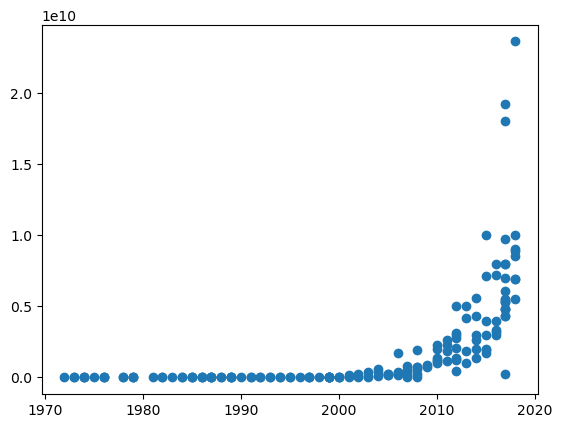

In [9]:
plt.scatter(x,y)

Converting exponential graph into linear

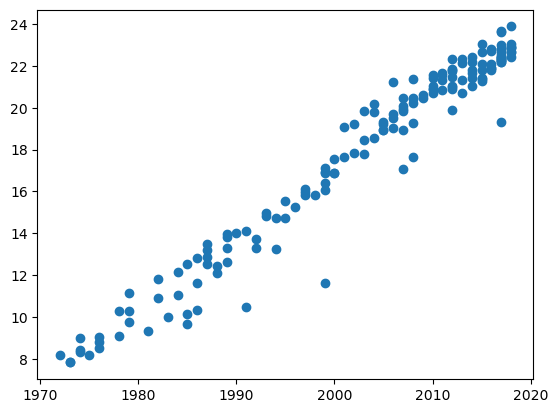

In [10]:
y=np.log(y)
plt.scatter(x,y)

Shrinking x value inorder to get better result


In [11]:
x=x-x.mean()

In [12]:
x

array([[-30.39130435],
       [-29.39130435],
       [-29.39130435],
       [-28.39130435],
       [-28.39130435],
       [-28.39130435],
       [-27.39130435],
       [-26.39130435],
       [-26.39130435],
       [-26.39130435],
       [-24.39130435],
       [-24.39130435],
       [-23.39130435],
       [-23.39130435],
       [-23.39130435],
       [-21.39130435],
       [-20.39130435],
       [-20.39130435],
       [-19.39130435],
       [-18.39130435],
       [-18.39130435],
       [-17.39130435],
       [-17.39130435],
       [-17.39130435],
       [-16.39130435],
       [-16.39130435],
       [-16.39130435],
       [-15.39130435],
       [-15.39130435],
       [-15.39130435],
       [-15.39130435],
       [-14.39130435],
       [-14.39130435],
       [-13.39130435],
       [-13.39130435],
       [-13.39130435],
       [-13.39130435],
       [-12.39130435],
       [-11.39130435],
       [-11.39130435],
       [-10.39130435],
       [-10.39130435],
       [ -9.39130435],
       [ -9

In [13]:
model=keras.models.Sequential([keras.layers.Input(shape=(1,)),keras.layers.Dense(1)])

In [14]:
model.compile(optimizer=keras.optimizers.SGD(0.001, 0.9),loss='mse')

In [15]:
def schedule(epoch, lr):   
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = keras.callbacks.LearningRateScheduler(schedule)

In [16]:
train=model.fit(x,y,epochs=100,verbose=1,callbacks=[scheduler])

Epoch 1/100
6/6 [==============================] - 0s 3ms/step - loss: 524.5478 - lr: 0.0010
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 335.1998 - lr: 0.0010
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 266.6078 - lr: 0.0010
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 592.1062 - lr: 0.0010
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 571.0915 - lr: 0.0010
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 364.1753 - lr: 0.0010
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 277.0977 - lr: 0.0010
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 170.2886 - lr: 0.0010
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 77.9490 - lr: 0.0010
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 66.7097 - lr: 0.0010
Epoch 11/100
6/6 [==============================] - 0s 2ms/step - loss:

In [17]:
model.evaluate(x,y)

6/6 [==============================] - 0s 3ms/step - loss: 0.8741


0.8740618228912354

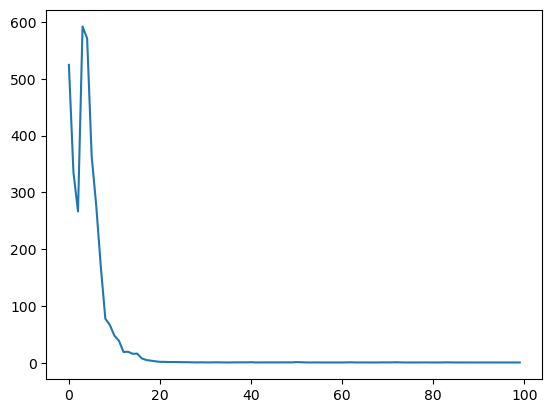

In [18]:
plt.plot(train.history['loss'], label='loss')